<a href="https://colab.research.google.com/github/dfquant/Financas/blob/Finan%C3%A7as/Free_Cash_Flow_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://github.com/dfquant/Financas/blob/Finan%C3%A7as/logo_df_quant.png?raw=true" width = "250">



---

# **Demonstração de cálculo de métricas fundamentalistas**

Muitas métricas fundamentalistas utilizadas no dia a dia do mercado financeiro para tomada de decisão de investimento não são encontradas facilmente, diretamente nos balanços e demonstrativos.

Isso porque essas métricas são derivadas, ou seja, utilizam variáveis obtidas nos demonstrativos e balanços e colocadas em fórmulas para fins de criação de índices, razões, etc.

Normalmente, conseguimos obter os dados de balanços e demonstrativos. Como fazer então para calcular uma dessas métricas derivadas para várias empresas ao mesmo tempo?

## 0. Introdução

<center><img src = "https://republicsmetoolkit.com/wp-content/uploads/2019/09/cash-flow-projection.jpg?raw=true" width = "300">

### **Free Cash Flow (Fluxo de Caixa)**



O dinheiro que a empresa tem disponível para repassar aos credores ou pagar dividendos e juros para investidores.
Representa o caixa que uma empresa gera após contabilizar as saídas de caixa para apoiar as operações e manter seus ativos de capital.

### **Free Cash Flow Yield (Rendimento do Fluxo de Caixa Livre)**



Ao avaliar ações, a maioria dos investidores está familiarizada com indicadores fundamentalistas famosos, como o índice preço/lucro (P/L), valor contábil, preço/valor contábil (P/B) e o índice PEG. Além disso, os investidores que reconhecem a importância da geração de caixa utilizam as demonstrações de fluxo de caixa da empresa ao analisar seus fundamentos. Reconhecem que estas declarações oferecem uma melhor representação das operações da empresa.

No entanto, muito poucas pessoas analisam quanto fluxo de caixa livre (FCF) está disponível em relação ao valor da empresa.

Chamado de rendimento do fluxo de caixa livre (Free Cash Flow Yield, ou FCFY), é um indicador melhor do que o índice P/L.

<center><img src = "https://www.investopedia.com/thmb/QCI4TrdgWKZXY6NDqe3bp_b9BX0=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/freecashflowyield.asp-FINAL-ff037b79fb4b41a3b72c95f5ce051662.png?raw=true" width = "500">


O índice P/L mede quanto lucro líquido anual está disponível por ação ordinária. No entanto, a demonstração do fluxo de caixa é uma medida melhor do desempenho de uma empresa do que a demonstração do resultado.

Existe uma ferramenta de medição comparável ao índice P/L que utiliza a demonstração do fluxo de caixa?

Felizmente, sim. Podemos usar o fluxo de caixa livre e dividi-lo pelo valor da empresa como um indicador mais confiável. Chamado de rendimento do fluxo de caixa livre, isso oferece aos investidores outra maneira de avaliar o valor de uma empresa que é comparável ao índice P/L. Como esta medida utiliza o fluxo de caixa livre, o rendimento do fluxo de caixa livre fornece uma medida melhor do desempenho de uma empresa.

A maneira mais comum de calcular o rendimento do fluxo de caixa livre é usar a capitalização de mercado como divisor.


\begin{align}
        \text{Free Cash Flow Yield} = \frac{\text{Free Cash Flow (Fluxo de Caixa Livre) }}{\text{Market Capitalization (Valor de Mercado)}}
    \end{align}



Geralmente, quanto menor a proporção do resultado, menos atraente é o investimento, e vice-versa. A lógica é, os investidores preferem obviamente pagar o menor preço possível pelo maior número de ganho possível.

---

#### Sources:


Free Cash Flow:

https://www.investopedia.com/terms/f/freecashflow.asp


Free Cash Flow Yield:

https://www.investopedia.com/articles/fundamental-analysis/09/free-cash-flow-yield.asp

https://andrebona.com.br/buggpedia-o-que-e-o-free-cash-flow-to-yield/

https://www.shopify.com/blog/free-cash-flow-yield

Free Cash Flow Margin:

https://www.wallstreetprep.com/knowledge/fcf-margin/



## 1. Importação das bibliotecas

In [29]:
import pandas as pd
import yfinance as yf

## 2. Explorar funcionalidades básicas da yfinance

In [30]:
grnd = yf.Ticker('GRND3.SA')

In [31]:
grnd.basic_info

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'



lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [32]:
grnd.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,3285526.0,1365793.0,1920510.0,-2347488.0,NaN
Tax Rate For Calcs,0.058,0.013,0.054,0.076,NaN
Normalized EBITDA,640224000.0,572781000.0,614225000.0,565440000.0,NaN
Total Unusual Items,56647000.0,105061000.0,35565000.0,-30888000.0,NaN
Total Unusual Items Excluding Goodwill,56647000.0,105061000.0,35565000.0,-30888000.0,NaN
Net Income From Continuing Operation Net Minority Interest,557671000.0,568027000.0,601005000.0,405206000.0,NaN
Reconciled Depreciation,95796000.0,93746000.0,91020000.0,88049000.0,NaN
Reconciled Cost Of Revenue,1349924000.0,1504894000.0,1312479000.0,1022330000.0,NaN
EBITDA,696871000.0,677842000.0,649790000.0,534552000.0,NaN
EBIT,601075000.0,584096000.0,558770000.0,446503000.0,NaN


In [33]:
grnd.quarterly_financials

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,-146278.0,10554960.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.230014,0.109,0.34,0.054894,0.209025,NaN,NaN
Normalized EBITDA,126142000.0,183011000.0,233144000.0,183489000.0,118181000.0,NaN,NaN
Total Unusual Items,NaN,-1342000.0,31044000.0,NaN,NaN,23093000.0,-2379000.0
Total Unusual Items Excluding Goodwill,NaN,-1342000.0,31044000.0,NaN,NaN,23093000.0,-2379000.0
Net Income From Continuing Operation Net Minority Interest,41647000.0,139691000.0,243032000.0,134276000.0,57246000.0,NaN,NaN
Reconciled Depreciation,20465000.0,21426000.0,23498000.0,23542000.0,24333000.0,NaN,NaN
Reconciled Cost Of Revenue,275611000.0,298938000.0,398168000.0,375725000.0,274073000.0,NaN,NaN
EBITDA,126142000.0,181669000.0,264188000.0,183489000.0,118181000.0,NaN,NaN
EBIT,105677000.0,160243000.0,240690000.0,159947000.0,93848000.0,NaN,NaN


In [34]:
grnd.quarterly_cash_flow

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,247264000.0,318001000.0,141387000.0,17336000.0,197516000.0,NaN,NaN
Repurchase Of Capital Stock,0.0,-3036000.0,0.0,0.0,0.0,NaN,NaN
Repayment Of Debt,-180090000.0,-58503000.0,-82363000.0,-85197000.0,-153032000.0,NaN,NaN
Issuance Of Debt,72915000.0,132120000.0,110182000.0,90480000.0,27588000.0,NaN,NaN
Issuance Of Capital Stock,0.0,1977000.0,0.0,0.0,0.0,NaN,NaN
Capital Expenditure,-36372000.0,-35536000.0,-26514000.0,-31460000.0,-27332000.0,NaN,NaN
End Cash Position,72900000.0,85780000.0,73735000.0,27480000.0,54326000.0,NaN,NaN
Beginning Cash Position,85780000.0,73735000.0,27480000.0,54326000.0,16382000.0,NaN,NaN
Changes In Cash,-12880000.0,12045000.0,46255000.0,-26846000.0,37944000.0,NaN,NaN
Financing Cash Flow,-328778000.0,72235000.0,-24596000.0,-12586000.0,-1308256000.0,NaN,NaN


In [35]:
grnd.basic_info['marketCap']

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'



5512229658.111572

## 3. Calcular métricas fundamentalistas derivadas

In [36]:
grnd_fcf = grnd.quarterly_cash_flow.loc['Free Cash Flow']

In [37]:
grnd_mktcap = grnd.basic_info['marketCap']

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'



In [38]:
grnd_fcf/grnd_mktcap

,Free Cash Flow
2024-06-30,0.044857
2024-03-31,0.05769
2023-12-31,0.02565
2023-09-30,0.003145
2023-06-30,0.035832
2023-03-31,NaN
2022-12-31,NaN


In [39]:
(grnd_fcf/grnd_mktcap)*100

,Free Cash Flow
2024-06-30,4.485735
2024-03-31,5.769009
2023-12-31,2.564969
2023-09-30,0.314501
2023-06-30,3.583232
2023-03-31,NaN
2022-12-31,NaN


In [40]:
grnd_fcfy  = pd.DataFrame((grnd_fcf/grnd_mktcap)*100)

In [41]:
grnd_fcfy.columns = ['GRND']

In [42]:
grnd_fcfy

,GRND
2024-06-30,4.485735
2024-03-31,5.769009
2023-12-31,2.564969
2023-09-30,0.314501
2023-06-30,3.583232
2023-03-31,NaN
2022-12-31,NaN


In [43]:
grnd_fcfy = grnd_fcfy[::-1]

In [44]:
grnd_fcfy

,GRND
2022-12-31,NaN
2023-03-31,NaN
2023-06-30,3.583232
2023-09-30,0.314501
2023-12-31,2.564969
2024-03-31,5.769009
2024-06-30,4.485735


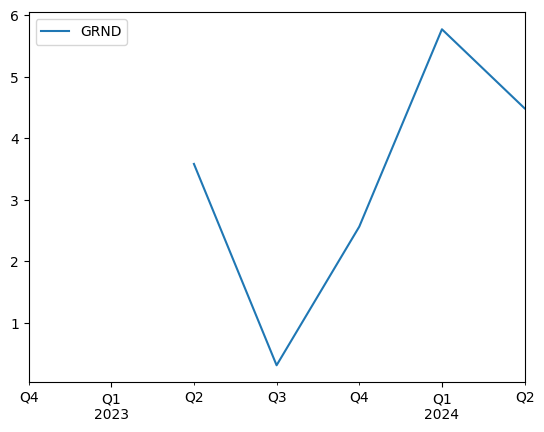

In [45]:
grnd_fcfy.plot();

In [46]:
ticker = 'WEGE3'
papel = yf.Ticker(ticker + '.SA')
papel_fcf = papel.quarterly_cash_flow.loc['Free Cash Flow']
papel_mktcap = papel.basic_info['marketCap']
papel_fcfy  = pd.DataFrame((papel_fcf/papel_mktcap)*100)
papel_fcfy.columns = [ticker]
papel_fcfy = papel_fcfy[::-1]

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'



In [47]:
papel_fcfy

,WEGE3
2022-12-31,NaN
2023-03-31,NaN
2023-06-30,0.166129
2023-09-30,0.712301
2023-12-31,0.65583
2024-03-31,0.551729
2024-06-30,0.498698


# 4. Criando funções de generalização

In [48]:
ativos = ['GRND3', 'VULC3', 'ALPA4', 'ARZZ3', 'VALE3', 'WEGE3']

In [49]:
free_cash_flow_yield = pd.DataFrame()

for i in ativos:

  papel = yf.Ticker(i + '.SA')

  papel_fcf = papel.quarterly_cash_flow.loc['Free Cash Flow']
  papel_mktcap = papel.basic_info['marketCap']

  papel_fcfy = (papel_fcf/papel_mktcap)*100
  papel_fcfy = papel_fcfy.astype(float)
  papel_fcfy = round(papel_fcfy, 2)

  free_cash_flow_yield[i] = papel_fcfy

free_cash_flow_yield = free_cash_flow_yield[::-1]

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is depr

In [50]:
free_cash_flow_yield

,GRND3,VULC3,ALPA4,ARZZ3,VALE3,WEGE3
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,NaN,NaN,NaN,0.99,NaN
2023-06-30,3.58,0.54,-1.51,0.05,0.28,0.17
2023-09-30,0.31,2.55,2.49,1.25,0.56,0.71
2023-12-31,2.56,1.50,4.21,4.39,1.07,0.66
2024-03-31,5.77,4.38,5.99,-1.81,0.87,0.55
2024-06-30,4.49,1.02,3.00,0.43,NaN,0.50


In [51]:
def fcfy(stocks):
  import pandas as pd
  import yfinance as yf

  free_cash_flow_yield = pd.DataFrame()

  for i in stocks:

    papel = yf.Ticker(i + '.SA')

    papel_fcf = papel.quarterly_cash_flow.loc['Free Cash Flow']
    papel_mktcap = papel.basic_info['marketCap']

    papel_fcfy = (papel_fcf/papel_mktcap)*100
    papel_fcfy = papel_fcfy.astype(float)
    papel_fcfy = round(papel_fcfy, 2)

    free_cash_flow_yield[i] = papel_fcfy

  free_cash_flow_yield = free_cash_flow_yield[::-1]

  return free_cash_flow_yield;

In [52]:
fcfy(['EQTL3', 'VALE3', 'RADL3', 'WEGE3', 'LREN3'])

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'



,EQTL3,VALE3,RADL3,WEGE3,LREN3
2022-12-31,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,0.99,NaN,NaN,NaN
2023-06-30,8.48,0.28,0.64,0.17,2.19
2023-09-30,-3.82,0.56,-0.56,0.71,3.66
2023-12-31,-16.03,1.07,-1.17,0.66,3.63
2024-03-31,-2.66,0.87,0.97,0.55,2.27
2024-06-30,4.90,NaN,-0.06,0.50,1.95


## 5. Plotagem

In [53]:
data = fcfy(['EQTL3', 'VALE3', 'RADL3', 'WEGE3', 'LREN3', 'PETR4'])

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:237: DeprecationWarning:

'Ticker.basic_info' is depr

In [54]:
data.index = data.index.strftime('%m/%Y')

In [55]:
data

,EQTL3,VALE3,RADL3,WEGE3,LREN3,PETR4
12/2022,NaN,NaN,NaN,NaN,NaN,NaN
03/2023,NaN,0.99,NaN,NaN,NaN,NaN
06/2023,8.48,0.28,0.64,0.17,2.19,1.32
09/2023,-3.82,0.56,-0.56,0.71,3.66,1.64
12/2023,-16.03,1.07,-1.17,0.66,3.63,1.59
03/2024,-2.66,0.87,0.97,0.55,2.27,1.29
06/2024,4.90,NaN,-0.06,0.50,1.95,1.21


Consulte outras possibilidades de paletas na documentação da plotly:

https://plotly.com/python/discrete-color/

In [56]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(data=[
    go.Bar(name='EQTL3', x=data.index, y=data['EQTL3'],marker_color=px.colors.qualitative.T10[0]),
    go.Bar(name='VALE3', x=data.index, y=data['VALE3'],marker_color=px.colors.qualitative.T10[9]),
    go.Bar(name='RADL3', x=data.index, y=data['RADL3'],marker_color=px.colors.qualitative.T10[4]),
    go.Bar(name='WEGE3', x=data.index, y=data['WEGE3'],marker_color=px.colors.qualitative.T10[3]),
    go.Bar(name='LREN3', x=data.index, y=data['LREN3'],marker_color=px.colors.qualitative.T10[8])
], layout=go.Layout(xaxis = {"type": "category"} ))

# Modificar o 'barmode' para agrupar as barras
fig.update_layout(title_text='Free Cash Flow Yield')
fig.update_layout(barmode='group')
fig.show()